# Lab Assignment 1(Decision tree and Random Forest)
## Credit Card Fraud Detection

### Group Members: 
> Yash Charpe(80)<br> Yeeshant Dahikar(73)<br> Mukesh Gurpude(44)<br> Sarang Wadode(15)

#### Task 2
Construct the decision tree using Sklearn library using `Entropy` and `Gini index` approach. Compare the result of both decision tree(_Accuracy,precision and recall and F1 score_ along with graphical visualization).
Check the decision tree performance when `presort =true` and `max depth=3` for both methods. Display the all disciontreeclassifier attributes values for both methods. Measure training error and test error to measure how many mistakes this tree has made on training data and test data respectively. Include a picture of the learned decision trees, at depth 4, 3, and 2, respectively.

Dataset Link: https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection

### Data preprocessing

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
df = pd.read_csv('./creditcardcsvpresent.csv')

In [3]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [4]:
df.shape

(3075, 12)

In [5]:
df.columns

Index(['Merchant_id', 'Transaction date', 'Average Amount/transaction/day',
       'Transaction_amount', 'Is declined', 'Total Number of declines/day',
       'isForeignTransaction', 'isHighRiskCountry', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [6]:
#missing values
df.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

<AxesSubplot:>

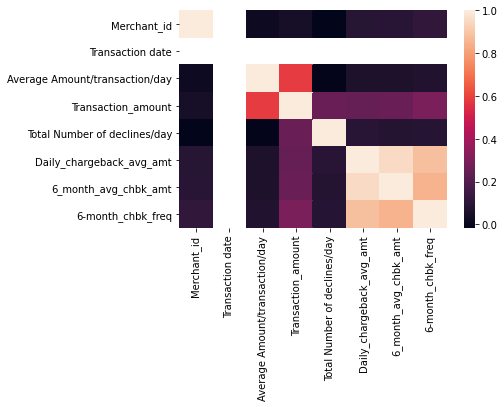

In [7]:
#view correlation
sns.heatmap(df.corr(), )

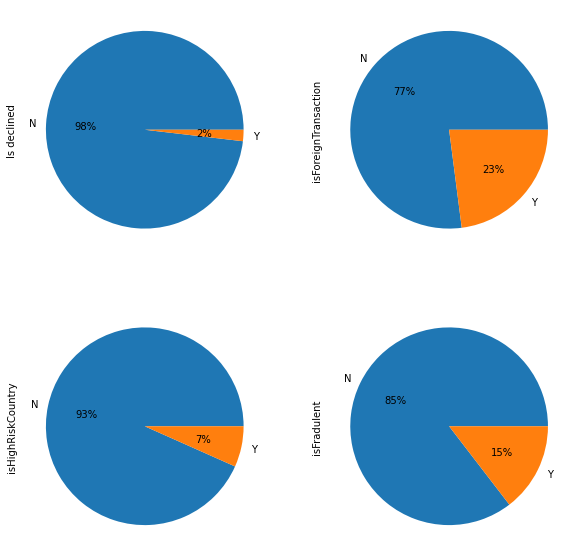

In [8]:
# visualize qualitative variables
plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(df.select_dtypes("object")):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')

In [9]:
# statistical analysis
df.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [10]:
# dropping unnecessary columns
df = df.drop(['Merchant_id','Transaction date'],axis='columns')

In [11]:
df.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [12]:
#setting isFraudelent as a target variables
inputs = df.drop('isFradulent',axis='columns')
target = df['isFradulent']

In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [14]:
declined = LabelEncoder()
foreignTransaction = LabelEncoder()
HighRiskCountry = LabelEncoder()

In [15]:
# Encode the labels

inputs['isDeclined'] = declined.fit_transform(inputs['Is declined'])
inputs['isForeignTransactions'] = declined.fit_transform(inputs['isForeignTransaction'])
inputs['isHighRiskCountrys'] = declined.fit_transform(inputs['isHighRiskCountry'])
inputs = inputs.drop(['Is declined','isHighRiskCountry','isForeignTransaction'],axis='columns')
inputs.head()

,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isDeclined,isForeignTransactions,isHighRiskCountrys
0,100.0,3000.0,5,0,0.0,0,0,1,1
1,100.0,4300.0,5,0,0.0,0,0,1,1
2,185.5,4823.0,5,0,0.0,0,1,0,0
3,185.5,5008.5,8,0,0.0,0,1,0,0
4,500.0,26000.0,0,800,677.2,6,0,1,1


### Data Splitting

In [16]:
from sklearn.tree import DecisionTreeClassifier    # Classifier
from sklearn.metrics import classification_report, confusion_matrix    # Metrices for result
from sklearn.model_selection import train_test_split  # Split the dataset into test and train

# splitting data
X_train, X_test, Y_train, Y_test = train_test_split(inputs,target,random_state=101,stratify=target,test_size=0.25)

In [17]:
# distribution in train set
Y_train.value_counts(normalize=True)

N    0.854293
Y    0.145707
Name: isFradulent, dtype: float64

In [18]:
# distribution in test set
Y_test.value_counts(normalize=True)

N    0.854356
Y    0.145644
Name: isFradulent, dtype: float64

In [19]:
# shape of training & testing set
X_train.shape, X_test.shape

((2306, 9), (769, 9))

#### Decision tree with Gini Index

In [20]:
# creating decision tree classifier model (Default = Gini)
dt_model = DecisionTreeClassifier(random_state=10)
# fitting the model with training set
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [21]:
# checking the training score
print('Accuracy Score for training data: ',dt_model.score(X_train,Y_train))

Accuracy Score for training data:  1.0


In [22]:
# checking the testing score
print('Accuracy Score for testing data: ',dt_model.score(X_test,Y_test))

Accuracy Score for testing data:  0.9830949284785435


In [23]:
#prediction on testing/validation set
predictGini = dt_model.predict(X_test)
predictGini

array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N

#### Decision tree with Entropy

In [24]:
#creating decision tree classifier model (criteria=entropy)
dt_modelEntropy = DecisionTreeClassifier(random_state=10,criterion="entropy")
#fitting the model with training set
dt_modelEntropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [25]:
#checking the training score
print('Accuracy Score for training data: ',dt_modelEntropy.score(X_train,Y_train))

Accuracy Score for training data:  1.0


In [26]:
#checking the validation score
print('Accuracy Score for testing data: ',dt_modelEntropy.score(X_test,Y_test))

Accuracy Score for testing data:  0.9869960988296489


In [27]:
#prediction on testing/validation set
predictEntropy = dt_modelEntropy.predict(X_test)
predictEntropy

array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N

In [28]:
print('Using Gini Index:')
matrixGini = confusion_matrix(Y_test,predictGini)
print('Confusion Matrix:\n',matrixGini)
gini_report = classification_report(Y_test,predictGini)
print('Classification Report:\n', gini_report)

Using Gini Index:
Confusion Matrix:
 [[646  11]
 [  2 110]]
Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.98      0.99       657
           Y       0.91      0.98      0.94       112

    accuracy                           0.98       769
   macro avg       0.95      0.98      0.97       769
weighted avg       0.98      0.98      0.98       769



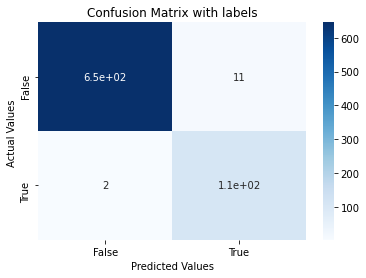

In [29]:
ax = sns.heatmap(matrixGini,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [30]:
print('Using Entropy:')
matrixEntropy = confusion_matrix(Y_test,predictEntropy)
print('Confusion Matrix:\n',matrixGini)
entropy_report = classification_report(Y_test,predictEntropy)
print('Classification Report:\n', entropy_report)

Using Entropy:
Confusion Matrix:
 [[646  11]
 [  2 110]]
Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.99      0.99       657
           Y       0.93      0.98      0.96       112

    accuracy                           0.99       769
   macro avg       0.96      0.98      0.97       769
weighted avg       0.99      0.99      0.99       769



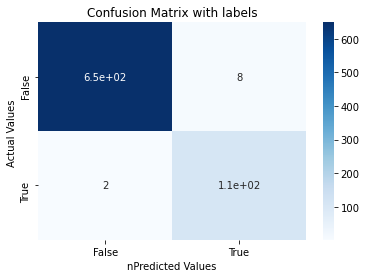

In [31]:
ax = sns.heatmap(matrixEntropy,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Results with `max_depth=3`

In [32]:
# with max depth 3
dt_model = DecisionTreeClassifier(random_state=10,max_depth=3)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [33]:
print('Accuracy Score for testing data: ',dt_model.score(X_test,Y_test))

Accuracy Score for testing data:  0.9804941482444733


In [34]:
predictGini = dt_model.predict(X_test)
predictGini

array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N

In [35]:
print('Using Gini Index:')
matrixGini = confusion_matrix(Y_test,predictGini)
print('Confusion Matrix:\n', matrixGini)
matrixGini = classification_report(Y_test,predictGini)
print('\nClassification Report:\n', matrixGini)

Using Gini Index:
Confusion Matrix:
 [[654   3]
 [ 12 100]]

Classification Report:
               precision    recall  f1-score   support

           N       0.98      1.00      0.99       657
           Y       0.97      0.89      0.93       112

    accuracy                           0.98       769
   macro avg       0.98      0.94      0.96       769
weighted avg       0.98      0.98      0.98       769



#### Entropy 

In [36]:
dt_modelEntropy = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=3)
dt_modelEntropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [37]:
print('Accuracy Score for testing data: ',dt_modelEntropy.score(X_test,Y_test))

Accuracy Score for testing data:  0.9804941482444733


In [38]:
predictEntropy = dt_modelEntropy.predict(X_test)
predictEntropy

array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N

In [39]:
print('Using Entropy:')
matrixEntropy = confusion_matrix(Y_test,predictEntropy)
print('Confusion Matrix:\n',matrixGini)
matrixEntropy = classification_report(Y_test,predictEntropy)
print('Classification Report:\n',matrixEntropy)

Using Entropy:
Confusion Matrix:
               precision    recall  f1-score   support

           N       0.98      1.00      0.99       657
           Y       0.97      0.89      0.93       112

    accuracy                           0.98       769
   macro avg       0.98      0.94      0.96       769
weighted avg       0.98      0.98      0.98       769

Classification Report:
               precision    recall  f1-score   support

           N       0.98      1.00      0.99       657
           Y       0.97      0.89      0.93       112

    accuracy                           0.98       769
   macro avg       0.98      0.94      0.96       769
weighted avg       0.98      0.98      0.98       769



### Variation in tree with `max_depth`

In [40]:
from sklearn import tree

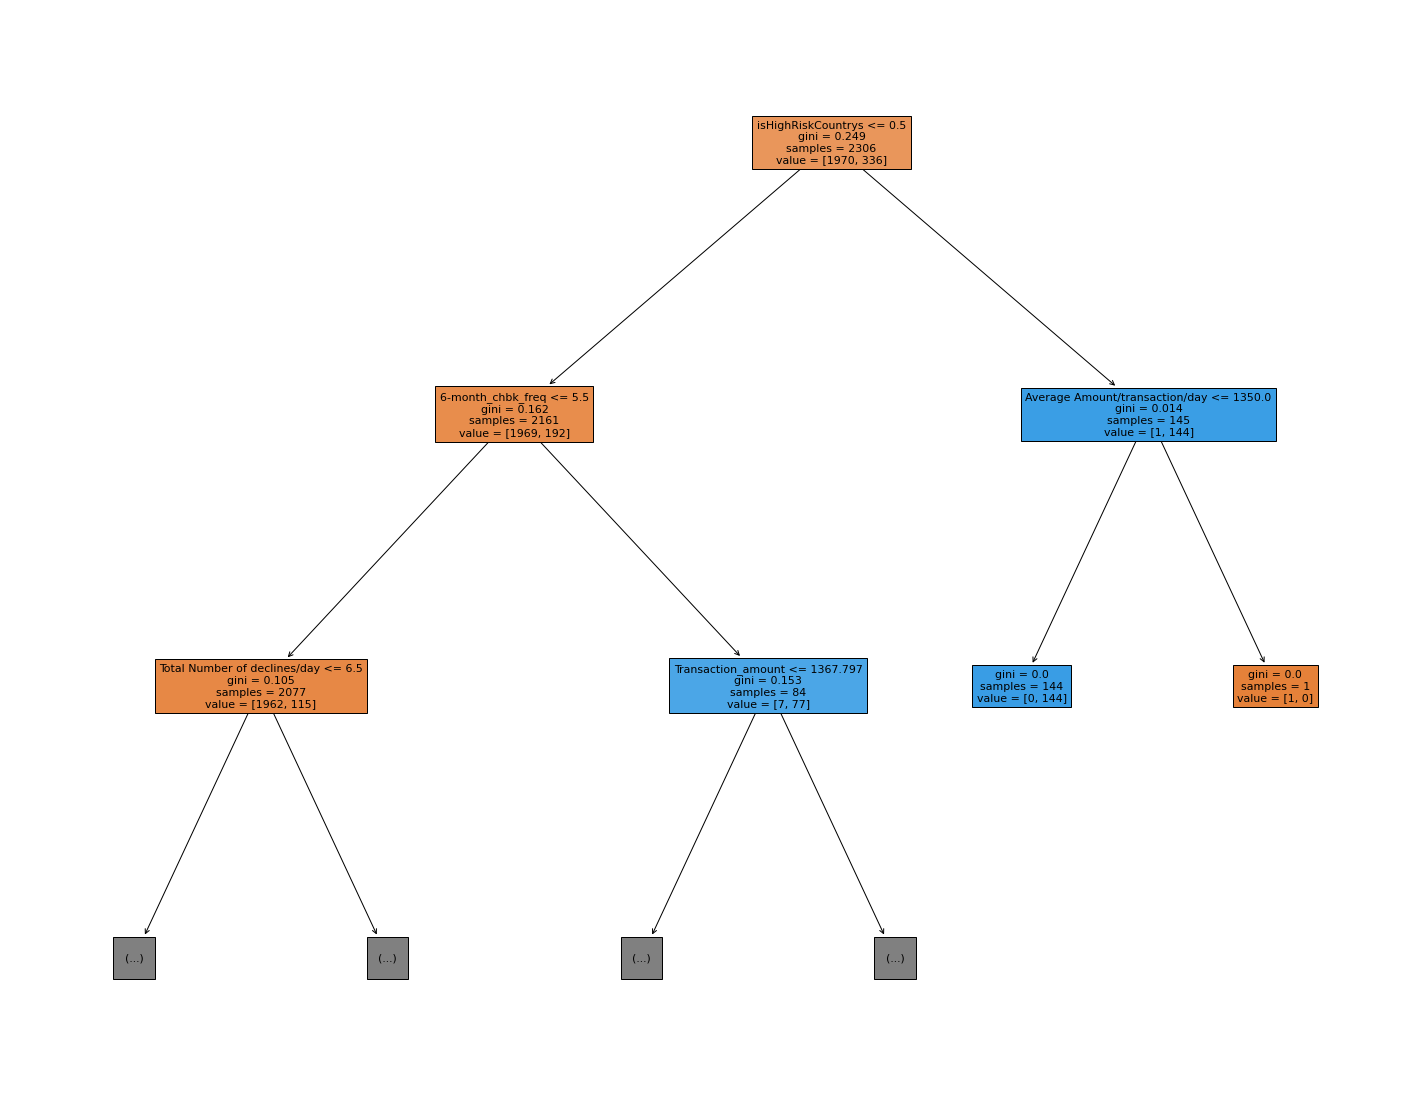

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=X_train.columns,max_depth=2,
                   filled=True)

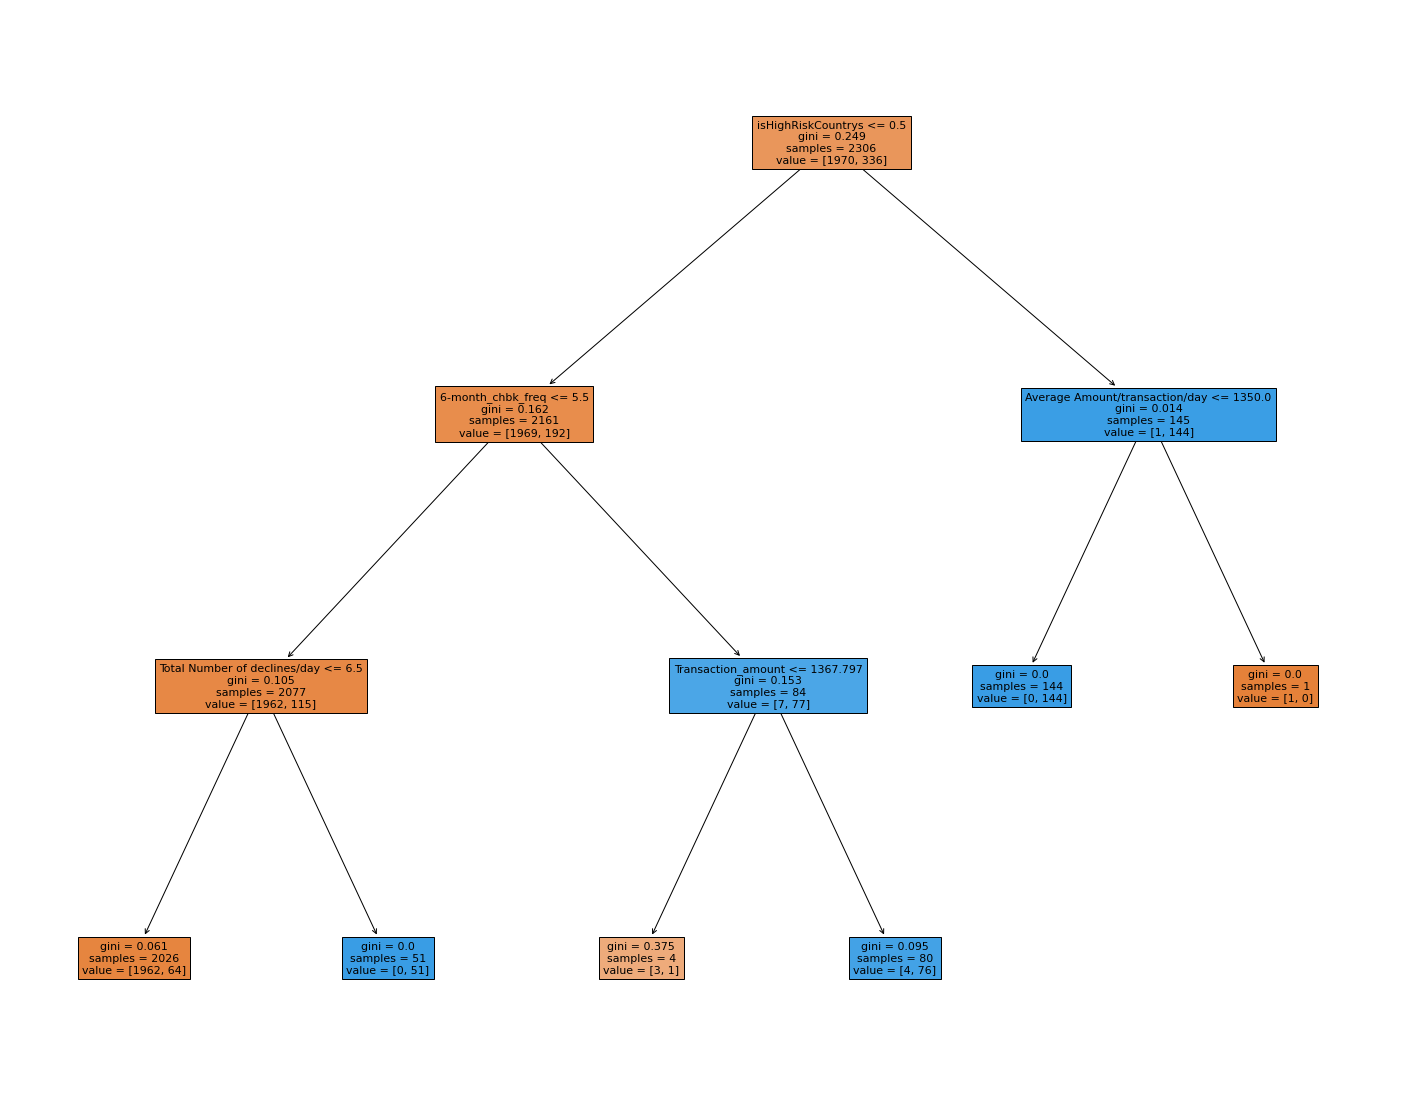

In [42]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=X_train.columns,max_depth=3,
                   filled=True)

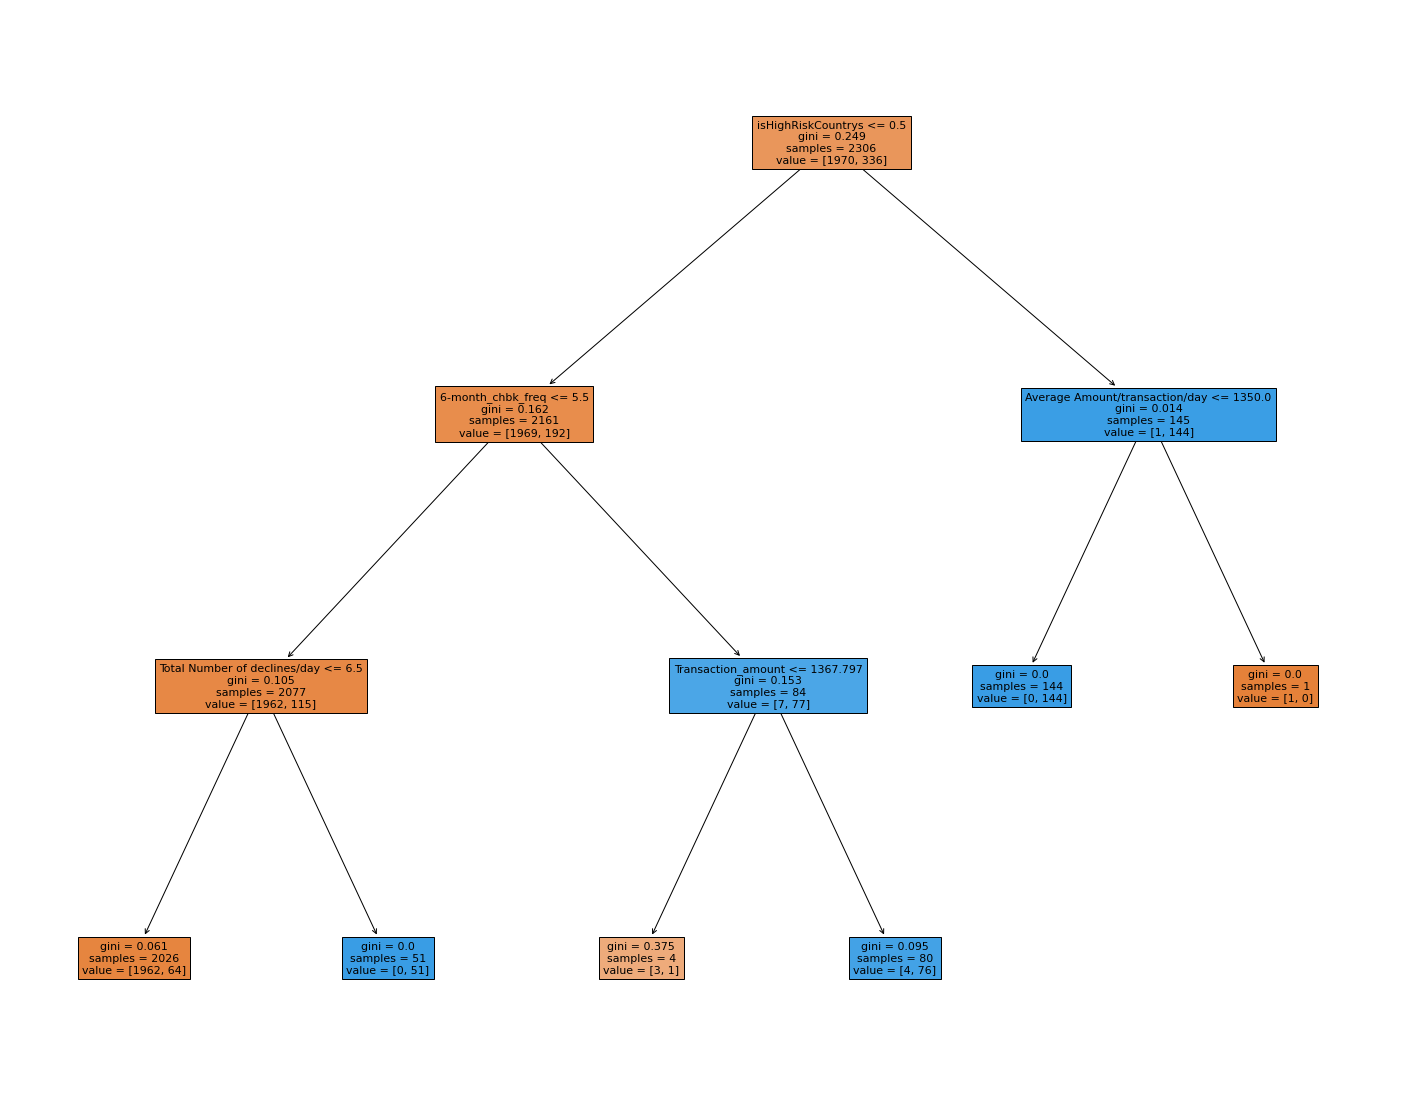

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=X_train.columns,max_depth=4,
                   filled=True)

## Remove unimportant feature

In [50]:
model = DecisionTreeClassifier(random_state=10, max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [51]:
features = inputs.columns
importances = model.feature_importances_

In [52]:
needed_features = [features[index] for index, i in enumerate(importances) if i != 0]

In [53]:
X_needed = X_train[needed_features]
X_test_needed = X_test[needed_features]

In [54]:
new_model = DecisionTreeClassifier(random_state=10)
new_model.fit(X_needed, Y_train)

DecisionTreeClassifier(random_state=10)

In [55]:
model.score(X_test, Y_test), new_model.score(X_test_needed, Y_test)

(0.9804941482444733, 0.9856957087126138)